# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集 
複習所學的知識點，並依照每日所學逐步建立出解答

### Day032 - 機器學習: 流程與步驟
1. 資料搜集、前處理: 
    - 資料前處理: 缺失值填補、離群值處理、標準化
    
2. 定義目標與評估準則:
    - 定義目標:
        回歸問題? 分類問題?  <br>
        要預測的目標是甚麼? (target 或 y)  <br>
        要用甚麼資料來進⾏預測? (predictor 或 x)  <br>
        將資料分為
        - 訓練集, training set
        - 驗證集, validation set
        - 測試集, test set
        
    - 設定評估準則: 不同問題有不同的評估指標
        - 回歸問題 (預測值為實數):
            - RMSE, Root Mean Square Error
            - Mean Absolute Error
            - R-Square
        - 分類問題 (預測值為類別):
            - Accuracy
            - F1-score
            - AUC, Area Under Curve
            
 
3. 建立模型與調整參數:
    - 根據設定目標建立機器學習模型
    - 各模型都有其超參數需調整，根據經驗與對模型了解、訓練情形等進⾏調參
    
    
4. 導入:
    - 建立資料搜集、前處理等流程
    - 送進模型進⾏預測
    - 輸出預測結果
    - 視專案需求整合前後端: 建議統⼀資料格式，方便讀寫 (.json, .csv)

### Day001 - 資料介紹與評估指標
這部分將回答以下四個問題:
1. 為什麼這個問題重要？
> 可以透過高階經理人內部的mail來往以及薪資、股票等財務特徵來找出可疑的詐欺犯罪者

2. 資料從何而來？
> Email資料來自[Enron Email Dataset](https://www.cs.cmu.edu/~./enron/)，由CALO Project收集 <br>
財務資料來自[FindLaw.com](http://www.findlaw.com)

3. 資料的型態是什麼？
> 資料的型態為結構化資料， 有關財務的特徵共有14個(單位皆為美元)，分別為
    - salary
    - deferral_payments
    - total_payments
    - loan_advances
    - bonus
    - restricted_stock_deferred
    - deferred_income
    - total_stock_value
    - expenses
    - exercised_stock_options
    - other
    - long_term_incentive
    - restricted_stock
    - director_fees
    
    > 有關 email 的特徵共有六個(除了 email_address，其餘皆為次數)，分別為
    - to_messages
    - email_address
    - from_poi_to_this_person
    - from_messages
    - from_this_person_to_poi
    - shared_receipt_with_poi
    
    > 要預測的目標為POI label: [‘poi’] (boolean, represented as integer)

4. 我們可以回答什麼問題？
> Kaggle的評估指標為 AUC

### Day002 - EDA: 讀取資料 & Data summary
EDA指的是初步透過視覺化/統計工具進行分析，達到三個主要目的
1. 了解資料: 獲取資料所包含的資訊、結構和特點
2. 發現 outliers 或異常數值: 檢查資料是否有誤
3. 分析各變數間的關聯性: 找出重要的變數

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# Set data_path
dir_data = '../Data/Mid/'

# Load in data
df_train = pd.read_csv(dir_data + 'train_data.csv')
df_test = pd.read_csv(dir_data + 'test_features.csv')
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


#### 行與欄的總數

In [2]:
df_train.shape

(113, 22)

#### 各欄的資料型態與是否有缺失值

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

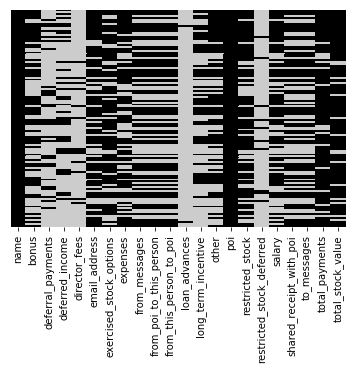

In [4]:
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='nipy_spectral');

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

loan_advances                111
restricted_stock_deferred    103
director_fees                100
deferral_payments             85
deferred_income               79
long_term_incentive           64
bonus                         52
shared_receipt_with_poi       48
from_poi_to_this_person       48
from_messages                 48
to_messages                   48
from_this_person_to_poi       48
other                         44
salary                        40
expenses                      40
exercised_stock_options       32
restricted_stock              31
email_address                 30
total_payments                17
total_stock_value             15
poi                            0
name                           0
dtype: int64

> 可以看出很多欄位有大量缺失值，其中director_fees、loan_advances、restricted_stock_deferred甚至有破百個缺失值<br>
值得注意的是除了email_address外，其他與email相關的欄位缺失值的數目是一樣的

In [6]:
email_features = ['from_messages', 'from_poi_to_this_person', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages']
no_miss_email = df_train[email_features].dropna(axis=0)
print(no_miss_email.shape)
no_miss_email.tail()

(65, 5)


,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
106,56.0,25.0,19.0,117.0,258.0
109,41.0,13.0,1.0,761.0,1486.0
110,67.0,7.0,0.0,728.0,898.0
111,19.0,4.0,7.0,471.0,573.0
112,1215.0,74.0,65.0,4527.0,15149.0


> 可以發現這些欄位是這65人才有，且有些欄位是0.0

#### 資料中各個欄位類型的數量

In [7]:
df_train.dtypes.value_counts()

float64    19
object      2
bool        1
dtype: int64

> 由上面可以看出總共有22個columns，其中有2個類別型欄位，分別是name與email_address，這兩個應該都與預測關係不大，可以先不用處理，另外目標變數poi是boolean型態

#### 了解Target variable - poi的分類比例

In [8]:
df_train.poi.value_counts()

False    100
True      13
Name: poi, dtype: int64

> poi的分布並不均勻，大部分的人都是清白的。這樣高度偏差的模型會對預測造成影響，請參考[What does it mean to have high AUC but low F1 score?](https://www.quora.com/What-does-it-mean-to-have-high-AUC-but-low-F1-score)

#### Skew
$skew = \frac{negative-samples}{positive-samples}$

In [9]:
100/13

7.6923076923076925

> 不算很高，但在小的資料集裡面已經很多很多了

#### 總結統計數值

In [10]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


### Day005 - EDA: 資料分佈
以單變量分析來說，量化的分析方式可大致分為兩類
- 集中趨勢: 平均值(Mean)、中位數(Median)、眾數(Mode)
- 分散程度: 最小值(Min)、最大值(Max)、範圍(Range)、四分位差(Quartiles)、變異數(Variance)、標準差(Standar deviation)
使用上述的描述統計我們可以初步了解資料，並觀察是否有異常。

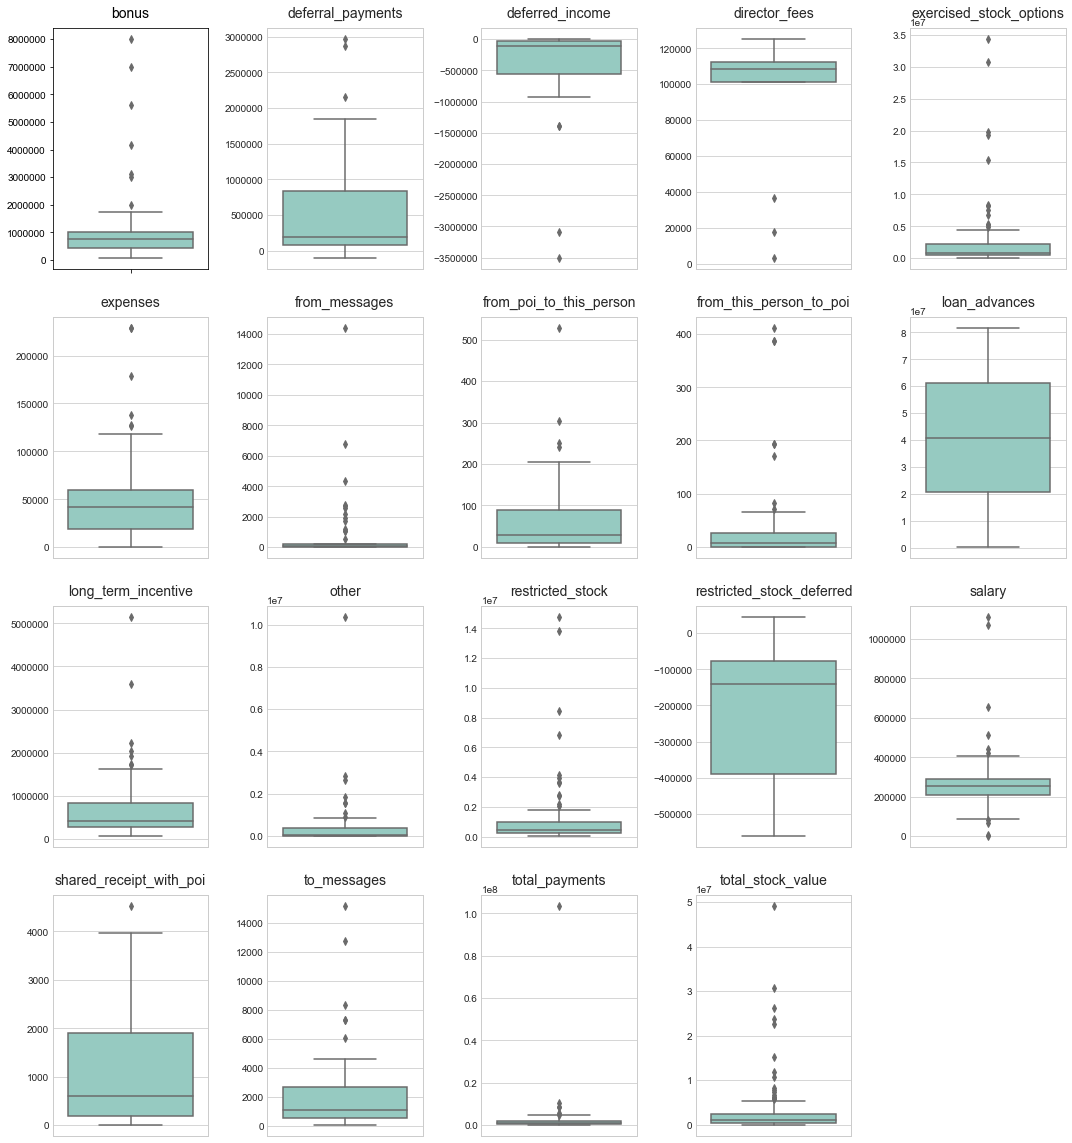

In [11]:
df_num = df_train.select_dtypes(exclude=["object", "bool"])
col = df_num.columns.values
number_of_columns = 5
number_of_rows = (len(col)-1)//number_of_columns + 1
plt.figure(figsize=(3*number_of_columns, 5*number_of_rows))

for i in range(0,len(col)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_num[col[i]], palette="Set3", orient='v')
    plt.title(col[i], size=14, y=1.02)
    plt.ylabel('')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)

### Day019 - 數值型特徵: 補缺失值與標準化
填補缺值最重要的是
1. 欄位中的領域知識
2. 欄位中的非缺數值

### 填補缺值的方法
* __填補統計值__

    - 填補平均數 (Mean): _數值型欄位_，偏態不明顯。
    - 填補中位數 (Median): _數值型欄位_，偏態很明顯。
    - 填補眾數 (Mode): _類別型欄位_。
* __填補指定值__ - 需對欄位領域知識已有了解

    - 補零: 空缺本來就有0的意思，可由其他非缺數值判斷。
    - 補不可能出現的數值: _類別型欄位_，但不適合用眾數時。
* __填補預設值__ - 速度較慢但精確，從其他資料欄欄位學得填補知識。
    - 若填補範圍廣，且是重要特徵欄位時可用此方式。
    - 本⽅方式須提防overfitting : 可能退化成為其他特徵的組合。

> 觀察財務資料，推估缺失值原因應是沒有值，所以將財務資料的缺失值補零即可。<br>
而email資料只有某一部分人有，而且裡面也有0.0的資料，因此將這類資料分為poi跟非poi來填補。

In [12]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV, cross_val_score   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# 重組資料成為訓練 / 預測用格式
train_Y = df_train['poi']
names = df_test['name']
df_train_dropped = df_train.drop(['name', 'email_address'] , axis=1)
df_test_dropped = df_test.drop(['name', 'email_address'] , axis=1)
df = pd.concat([df_train_dropped,df_test_dropped])
train_num = train_Y.shape[0]
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [13]:
df_fixed = copy.deepcopy(df)

# impute email features with different group's median
df_fixed.loc[df_fixed.poi == 1, email_features] = df_fixed[email_features][df_fixed.poi == 1].fillna(df_fixed[email_features][df_fixed.poi == 1].median())
df_fixed.loc[df_fixed.poi == 0, email_features] = df_fixed[email_features][df_fixed.poi == 0].fillna(df_fixed[email_features][df_fixed.poi == 0].median())
# impute finacial features with 0
df_fixed = df_fixed.fillna(0).drop(['poi'] , axis=1)

train_X = df_fixed[:train_num]
test_X = df_fixed[train_num:]

In [14]:
def modelfit(model, df_train, features, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model.fit(df_train[features], train_Y)
        
    #Predict training set:
    pred = model.predict(df_train[features])
    pred_prob = model.predict_proba(df_train[features])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score_auc = cross_val_score(model, df_train[features], train_Y, cv=cv_folds, scoring='roc_auc')
        cv_score_f1 = cross_val_score(model, df_train[features], train_Y, cv=cv_folds, scoring='f1')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_Y.values, pred))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_Y, pred_prob))
    
    if performCV:
        print("CV Score AUC : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_auc),np.std(cv_score_auc),np.min(cv_score_auc),np.max(cv_score_auc)))
        print("CV Score F1: Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_f1),np.std(cv_score_f1),np.min(cv_score_f1),np.max(cv_score_f1)))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\ChihYing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score AUC : Mean - 0.9183333 | Std - 0.06244998 | Min - 0.8333333 | Max - 1
CV Score F1: Mean - 0.5809524 | Std - 0.324928 | Min - 0 | Max - 1


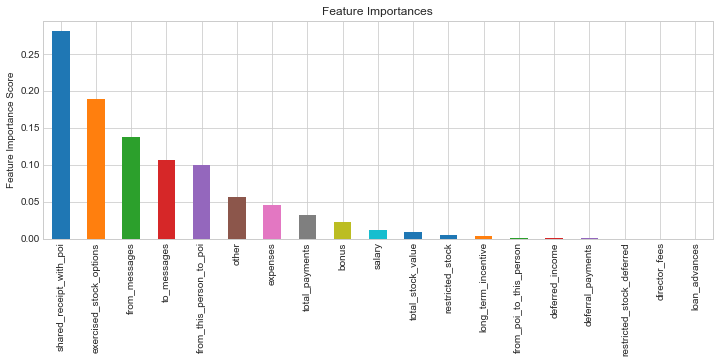

In [15]:
#Choose all features
features = [col for col in df_fixed]
gbm0 = GradientBoostingClassifier(random_state=4)
modelfit(gbm0, train_X, features)

### Day006 - EDA: Outlier 及處理
- 異常值 (Outliers) 出現的可能原因:
    1. 未知值，隨意填補 (約定俗成的代入): 如年齡 = -1 或 999, 電話是 0900-123-456 
    2. 錯誤紀錄/手誤/系統性錯誤L 如某本書在某筆訂單的銷售量 = 1000 本
    
- 檢查 Outliers 的流程與方法:
    1. 盡可能確認每一個欄位的意義。
    2. 透過檢查數值範圍 (五值、平均數及標準差) 或繪製散點圖 (scatter)、分布圖 (histogram) 或其他圖檢查是否有異常。
    
- 對 Outliers 的處理方法:
    1. 新增欄位用以紀錄異常與否
    2. 填補 (取代)
    3. 視情況以中位數, Min, Max 或平均數填補(有時會用 NA)
    
    
### Day020 - 數值型特徵: 去除離群值
有時會有與其他數值差距很大的離群值存在，只要離群值數量夠少，除去離群值將可使得模型預測較為準確。

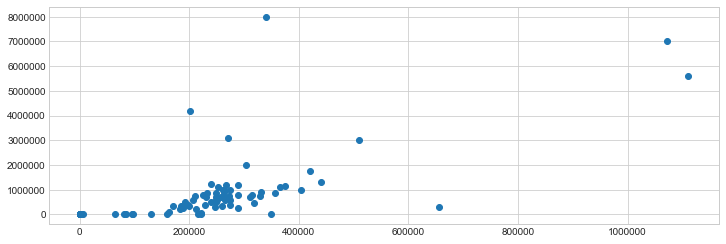

In [16]:
plt.scatter(x=train_X.salary, y=train_X.bonus, cmap='cool')

In [17]:
df_train[['name', 'poi']][df_train.bonus > 4000000]

,name,poi
1,SKILLING JEFFREY K,True
8,LAY KENNETH L,True
14,ALLEN PHILLIP K,False
33,LAVORATO JOHN J,False


> 看起來這些不能算作outlier

In [18]:
# missing value more than 80%
df_train[df_train.isnull().sum(axis=1) > df_train.shape[1]*0.8]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
17,WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130.0
30,WHALEY DAVID A,NaN,NaN,NaN,NaN,NaN,98718.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,98718.0
65,THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096.0,False,NaN,NaN,NaN,NaN,NaN,362096.0,NaN
79,GRAMM WENDY L,NaN,NaN,NaN,119292.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,119292.0,NaN
107,LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_fixed.drop(axis=0, labels=['WROBEL BRUCE', 'WHALEY DAVID A', 'THE TRAVEL AGENCY IN THE PARK', 'GRAMM WENDY L', 'LOCKHART EUGENE E'], inplace=True)
train_X = df_fixed[:train_num]
test_X = df_fixed[train_num:]

> 這五個人都有超過8成的資料遺失，加上他們都不是poi，所以將他們從資料中移除。

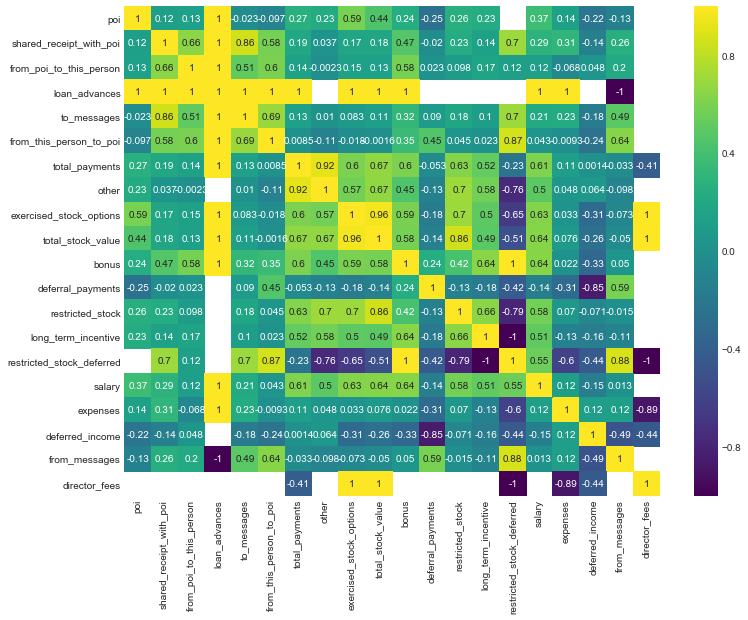

In [20]:
k = 21 #number of variables for heatmap
df_corr = copy.deepcopy(df_fixed)
df_corr['poi'] = df_train['poi']
cols = df_corr.corr().nlargest(k, 'poi')['poi'].index
cm = df_train[cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score AUC : Mean - 0.8583333 | Std - 0.1331248 | Min - 0.6333333 | Max - 1
CV Score F1: Mean - 0.6133333 | Std - 0.2362673 | Min - 0.3333333 | Max - 1


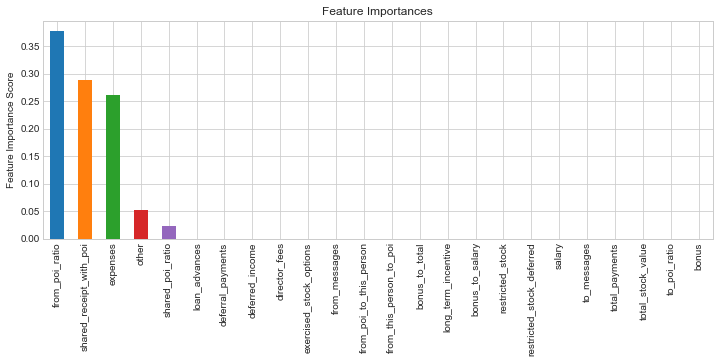

In [21]:
# Add the new email features to the dataframe
df_fixed['to_poi_ratio'] = (df_fixed['from_poi_to_this_person'] / df_fixed['to_messages']).fillna(0)
df_fixed['from_poi_ratio'] = (df_fixed['from_this_person_to_poi'] / df_fixed['from_messages']).fillna(0)
df_fixed['shared_poi_ratio'] = (df_fixed['shared_receipt_with_poi'] / df_fixed['to_messages']).fillna(0)
# Create the new financial features and add to the dataframe
df_fixed['bonus_to_salary'] = (df_fixed['bonus'] / df_fixed['salary']).fillna(0)
df_fixed['bonus_to_total'] = (df_fixed['bonus'] / df_fixed['total_payments']).fillna(0)

train_X = df_fixed[:train_num]
test_X = df_fixed[train_num:]

#Choose all features
features = [col for col in df_fixed]
gbm0 = GradientBoostingClassifier(random_state=4)
modelfit(gbm0, train_X, features)


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score AUC : Mean - 0.8766667 | Std - 0.1392839 | Min - 0.6416667 | Max - 1
CV Score F1: Mean - 0.707619 | Std - 0.1773987 | Min - 0.5 | Max - 1


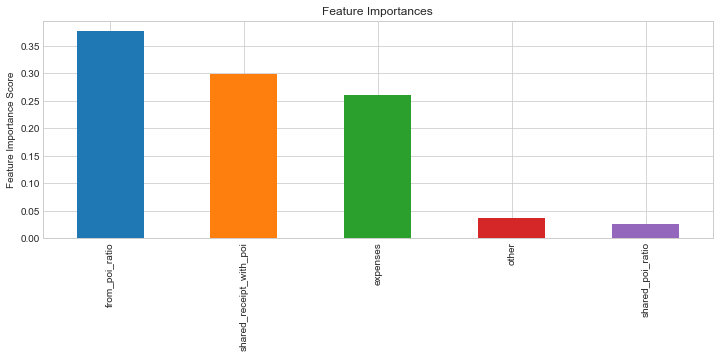

In [22]:
features = ['from_poi_ratio', 'shared_receipt_with_poi', 'expenses', 'other', 'shared_poi_ratio']
gbm0 = GradientBoostingClassifier(random_state=4)
modelfit(gbm0, train_X, features)

In [23]:
param_test1 = {'n_estimators':list(range(20,101,5))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=4, max_depth=7, max_features='sqrt',subsample=0.8,random_state=4), 
                        param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(train_X[features], train_Y)

gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 100}, 0.9716666666666667)

In [ ]:
param_test2 = {'max_depth':list(range(2,16,1)), 'min_samples_split':list(range(2,21,1))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=65, max_features='sqrt', subsample=0.8, random_state=4), 
param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)

gsearch2.fit(train_X[features], train_Y)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 6, 'min_samples_split': 15}, 0.9800000000000001)

In [ ]:
param_test3 = {'min_samples_split':list(range(20,51,1)), 'min_samples_leaf':list(range(1,31,1))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=65,max_depth=10,max_features='sqrt', subsample=0.8, random_state=4), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_X[features], train_Y)
gsearch3.best_params_, gsearch3.best_score_

In [ ]:
modelfit(gsearch3.best_estimator_, train_X, features)

In [ ]:
train_X = df_fixed[:train_num][features]
test_X = df_fixed[train_num:][features]
gbm0.fit(train_X, train_Y)
pred = gbm0.predict_proba(test_X)[:, 1]
sub = pd.DataFrame({'name': names, 'poi': pred})
sub.to_csv('mid_tuned_gbm.csv', index=False)